In [335]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract

In [2]:
df = pd.read_csv("LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

**OBSERVATION** : There are a total of 614 rows and 13 columns in the raw dataset

In [4]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [5]:
df.rename(columns={"ApplicantIncome":"Applicant_Income","CoapplicantIncome":"Coapplicant_Income","LoanAmount":"Loan_Amount"},inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df["Loan_ID"].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [7]:
df["Loan_ID"].nunique()

614

**OBSERVATION** : The Loan_ID column has as many unique values as the length of the Data Frame. 
Even though it is considered as unimportant column it can be kept to only use it in case of data transformation. 

In [8]:
df["Gender"].unique().tolist()

['Male', 'Female', nan]

**OBSERVATION** : There are missing values in the Gender column

In [9]:
df["Married"].unique().tolist()

['No', 'Yes', nan]

In [10]:
df["Dependents"].unique().tolist()

['0', '1', '2', '3+', nan]

**OBSERVATION** : Dependents have wrong data and hence wrong data type

In [11]:
df["Education"].unique().tolist()

['Graduate', 'Not Graduate']

In [12]:
df["Self_Employed"].unique().tolist()

['No', 'Yes', nan]

In [13]:
L =[]
for i in df["Applicant_Income"].unique().tolist():
    if type(i) not in [int,float]:
        L.append(i)
print(L)

[]


**OBSERVATION** : Correct data type for the "Applicant_Income" column.

In [14]:
len(df["Applicant_Income"].unique().tolist())

505

In [15]:
df["Coapplicant_Income"].isnull().sum()

np.int64(0)

TO CHECK IF THERE ARE ANY NULL VALUES IN THIS COLUMN.

In [16]:
df["Coapplicant_Income"] = df["Coapplicant_Income"].astype(int)

TO COVERT THE DATA TYPE TO INT

In [17]:
df["Loan_Amount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [18]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y


In [19]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [20]:
df["Credit_History"].unique() 
#it is encoded as 0 = Bad and 1 = Good

array([ 1.,  0., nan])

In [21]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [22]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income      int64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

Dependents column has wrong data type due to wrong data.

Loan_Amount has data type due to null values.    
Loan_Amount_Term has data type due to null values.       

In [24]:
df["Credit_History"] = df["Credit_History"].replace({0:"Bad",1:"Good"})
df[(df["Credit_History"] == "Bad") & (df["Loan_Status"]=="Y")]
# There are 7 no.of applications with bad Credit history but loan status as Yes 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980,137.0,360.0,Bad,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0,600.0,180.0,Bad,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0,166.0,360.0,Bad,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811,160.0,360.0,Bad,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0,130.0,360.0,Bad,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466,90.0,180.0,Bad,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430,161.0,360.0,Bad,Semiurban,Y


In [25]:
df[(df["Credit_History"] == "Bad") & (df["Loan_Status"]=="N")]
# There are 82 no.of applications with bad Credit history but loan status as Yes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158.0,360.0,Bad,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0,76.0,360.0,Bad,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0,104.0,360.0,Bad,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911,116.0,360.0,Bad,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917,112.0,360.0,Bad,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210,136.0,360.0,Bad,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917,146.0,360.0,Bad,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0,106.0,360.0,Bad,Semiurban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0,88.0,360.0,Bad,Semiurban,N


In [26]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    int64  
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    object 
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 62.5+ KB


In [28]:
continuous = ["Applicant_Income","Coapplicant_Income","Loan_Amount"]

categorical = ["Gender","Married","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]

count = ["Dependents","Loan_Amount_Term"]

In [29]:
df[continuous].describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,614.000000,614.00000,592.000000
mean,5403.459283,1621.24430,146.412162
std,6109.041673,2926.24876,85.587325
min,150.000000,0.00000,9.000000
25%,2877.500000,0.00000,100.000000
50%,3812.500000,1188.50000,128.000000
75%,5795.000000,2297.25000,168.000000
max,81000.000000,41667.00000,700.000000


In [30]:
df[categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Good,Semiurban,Y
freq,489,398,480,500,475,233,422


In [31]:
print("There are",df.duplicated().sum(),"duplicate records in the data frame")

There are 0 duplicate records in the data frame


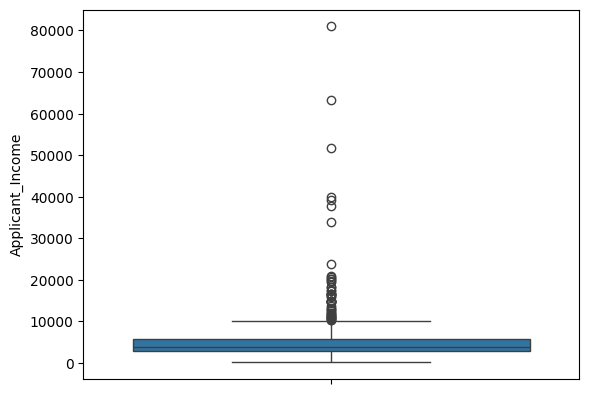

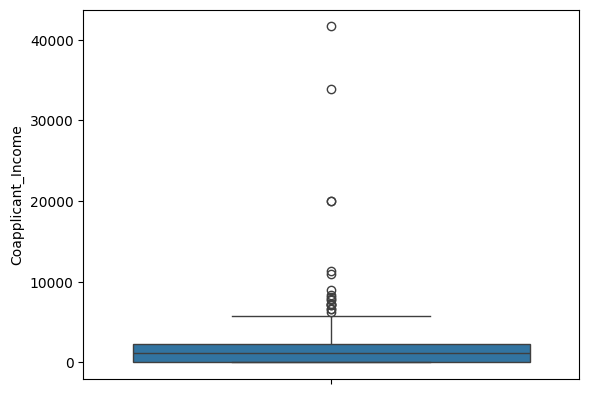

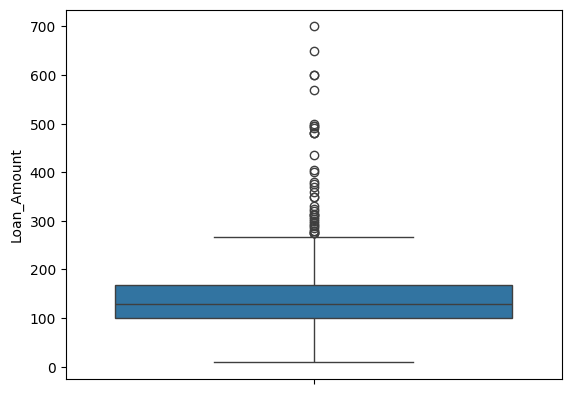

In [32]:
# Checking for OUTLIERS in continuous variables
# These are outliers but genuine values 
# Hence we retain them instead of removing.
for i in continuous:
    sns.boxplot(df[i])
    plt.show()

# High-income and high-loan applicants are genuine values, hence retained. For better visualization, log transformation was applied.

In [33]:
df[continuous].skew()

Applicant_Income      6.539513
Coapplicant_Income    7.491530
Loan_Amount           2.677552
dtype: float64

# Transform

In [34]:
# Data Cleaning
df["Dependents"] = df["Dependents"].replace({"3+":3})

In [35]:
df["Dependents"].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [36]:
categorical

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [38]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [39]:
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

In [40]:
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [41]:
df["Self_Employed"].isnull().sum()

np.int64(0)

In [42]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            15
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [43]:
df = df.dropna(subset="Loan_Amount")
# Dropped records which in which Loan Amount is null 

In [44]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            13
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Loan_Amount_Term      14
Credit_History        49
Property_Area          0
Loan_Status            0
dtype: int64

In [45]:
df['Dependents'].value_counts(dropna=False)

Dependents
0      334
1       98
2       98
3       49
NaN     13
Name: count, dtype: int64

Since most dependents are "0", we replace null values with 0.

In [46]:
df['Dependents'].mode()[0]

'0'

In [47]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [48]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Loan_Amount_Term      14
Credit_History        49
Property_Area          0
Loan_Status            0
dtype: int64

In [51]:
df["Dependents"] = df["Dependents"].astype(int)

In [53]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Loan_Amount_Term      14
Credit_History        49
Property_Area          0
Loan_Status            0
dtype: int64

In [54]:
df['Credit_History'].value_counts(dropna=False)

Credit_History
Good    458
Bad      85
NaN      49
Name: count, dtype: int64

# Credit history is directly related to Loan Eligibility and the null values in this column constitutes about 8% and hence it is safe if we do not drop the records
# Instead we replace it with mode i.e. "Good"

In [56]:
df['Credit_History'].mode()[0]

'Good'

In [57]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [61]:
df = df.dropna()

In [66]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype(int)

In [68]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents              int64
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income      int64
Loan_Amount           float64
Loan_Amount_Term        int64
Credit_History         object
Property_Area          object
Loan_Status            object
dtype: object

In [69]:
# Creating new column
df["Total_Income"] = df["Applicant_Income"] + df["Coapplicant_Income"]

In [71]:
# Dropping unimportant columns 
df = df.drop(columns=["Loan_ID","Applicant_Income","Coapplicant_Income"])

# LOAD

In [84]:
continuous.append("Total_Income")

In [86]:
continuous
#removed Applicant_Income and Coapplicant_Income and added Total_Income to the list

['Loan_Amount', 'Total_Income']

In [88]:
df[continuous].describe()

,Loan_Amount,Total_Income
count,578.000000,578.000000
mean,147.143599,7075.619377
std,86.342523,6597.498068
min,9.000000,1442.000000
25%,100.000000,4166.000000
50%,128.000000,5407.000000
75%,168.000000,7539.500000
max,700.000000,81000.000000


# For both the columns mean > median heance right skewed

In [92]:
df[categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,578,578,578,578,578,578,578
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Good,Semiurban,Y
freq,472,377,457,501,499,225,403


In [95]:
# Which category people have more applications
df["Gender"].value_counts()

Gender
Male      472
Female    106
Name: count, dtype: int64

In [96]:
df["Married"].value_counts()

Married
Yes    377
No     201
Name: count, dtype: int64

<BarContainer object of 2 artists>

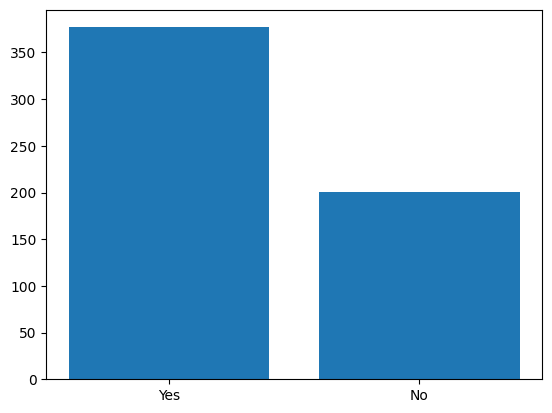

In [101]:
plt.bar(df["Married"].value_counts().index.tolist(),df["Married"].value_counts())

In [99]:
df["Loan_Status"].value_counts()

Loan_Status
Y    403
N    175
Name: count, dtype: int64

<BarContainer object of 2 artists>

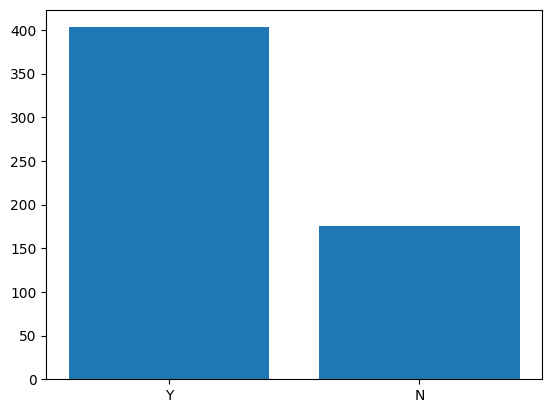

In [102]:
plt.bar(df["Loan_Status"].value_counts().index.tolist(),df["Loan_Status"].value_counts())

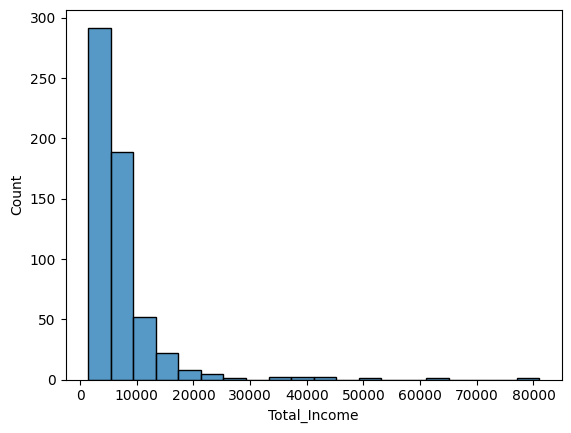

In [294]:
sns.histplot(df["Total_Income"],bins=20)
plt.show()

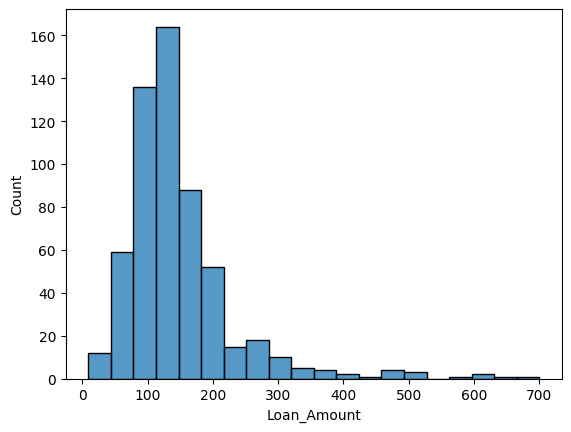

In [292]:
sns.histplot(df["Loan_Amount"],bins=20)
plt.show()

In [119]:
df.groupby(["Loan_Status","Gender"])["Loan_Amount"].describe().T

Loan_Status           N                       Y            
Gender           Female        Male      Female        Male
count         35.000000  140.000000   71.000000  332.000000
mean         130.085714  158.264286  126.323944  148.704819
std           65.471310   90.776713   86.935900   85.545399
min            9.000000   35.000000   30.000000   17.000000
25%           97.000000  104.000000   87.000000  104.000000
50%          112.000000  133.500000  113.000000  130.000000
75%          153.000000  182.750000  136.000000  172.000000
max          350.000000  570.000000  600.000000  700.000000

In [122]:
pd.crosstab(df["Gender"],df["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,35,71,106
Male,140,332,472
All,175,403,578


<Axes: xlabel='Gender', ylabel='count'>

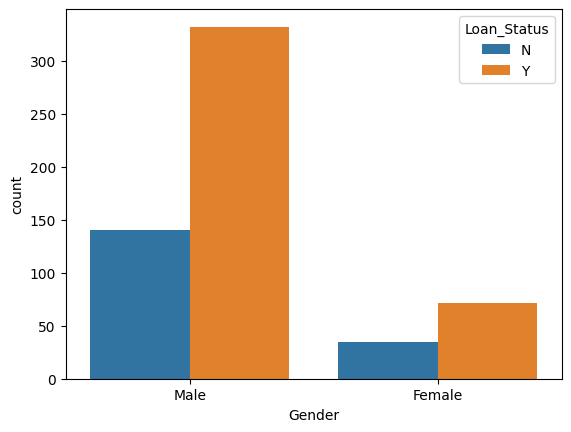

In [124]:
sns.countplot(data=df, x='Gender', hue='Loan_Status')

<BarContainer object of 578 artists>

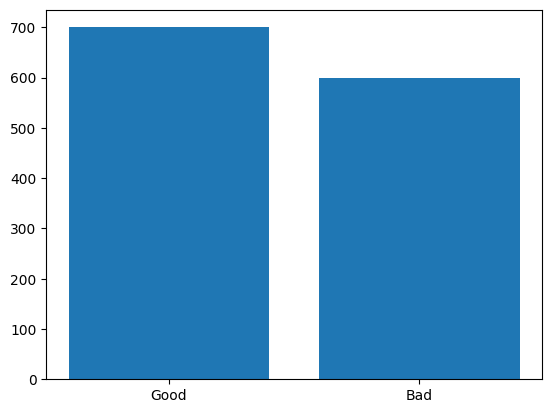

In [145]:
# Credit History vs Loan Status

plt.bar(df["Credit_History"],df["Loan_Amount"])

<Axes: xlabel='Credit_History', ylabel='count'>

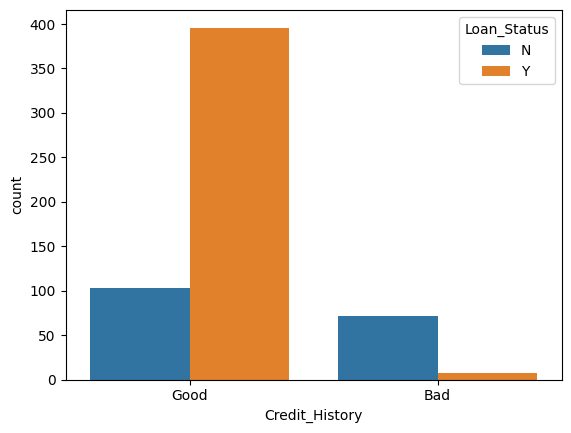

In [146]:
# Does having a good credit history improve loan approval chances?
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')

In [165]:
Group_CH_LS = df.groupby('Credit_History')["Loan_Status"].count()
Group_CH_LS

Credit_History
Bad      79
Good    499
Name: Loan_Status, dtype: int64

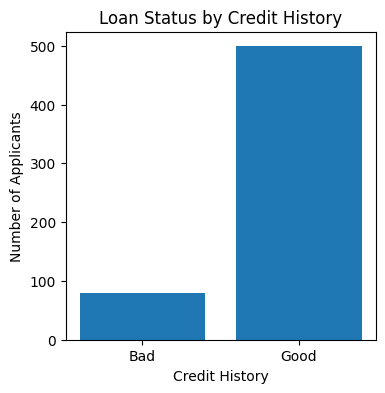

In [168]:
plt.figure(figsize=(4,4))
plt.bar(Group_CH_LS.index,Group_CH_LS.values)
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Number of Applicants")
plt.show()

In [169]:
df[(df["Credit_History"] == "Bad") & (df["Loan_Status"]=="Y")]

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
122,Female,No,0,Graduate,No,137.0,360,Bad,Semiurban,Y,11117
155,Male,Yes,3,Graduate,No,600.0,180,Bad,Semiurban,Y,39999
201,Male,No,2,Graduate,No,166.0,360,Bad,Semiurban,Y,4923
267,Male,Yes,3,Graduate,No,160.0,360,Bad,Urban,Y,6144
326,Male,No,0,Graduate,No,130.0,360,Bad,Rural,Y,4917
453,Male,Yes,0,Graduate,No,90.0,180,Bad,Rural,Y,4949
527,Male,Yes,1,Not Graduate,No,161.0,360,Bad,Semiurban,Y,6715


In [162]:
df[(df["Credit_History"] == "Bad") & (df["Loan_Status"]=="N")]

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
7,Male,Yes,3,Graduate,No,158.0,360,Bad,Semiurban,N,5540
17,Female,No,0,Graduate,No,76.0,360,Bad,Urban,N,3510
20,Male,Yes,0,Not Graduate,No,104.0,360,Bad,Urban,N,7660
22,Male,Yes,0,Not Graduate,No,116.0,360,Bad,Semiurban,N,4511
23,Male,Yes,2,Not Graduate,No,112.0,360,Bad,Rural,N,5282
...,...,...,...,...,...,...,...,...,...,...,...
576,Male,Yes,0,Graduate,No,136.0,360,Bad,Semiurban,N,5297
584,Male,Yes,1,Graduate,No,146.0,360,Bad,Rural,N,4704
589,Male,Yes,2,Graduate,Yes,106.0,360,Bad,Semiurban,N,2726
597,Male,No,0,Graduate,No,88.0,360,Bad,Semiurban,N,2987


In [171]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index') * 100

Loan_Status,N,Y
Credit_History,,
Bad,91.139241,8.860759
Good,20.641283,79.358717


# More than 91% of the of applicants who have bad Credit history have loan status as "NO" 

<Axes: xlabel='Loan_Status', ylabel='Total_Income'>

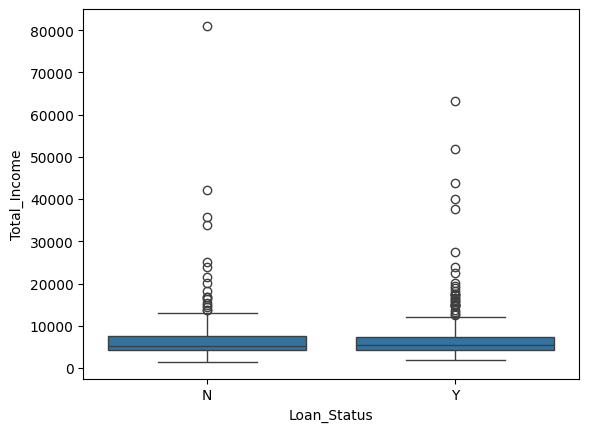

In [204]:
# Does higher income implies loan approval?
# Income is not the reason for loan approvals ! ! !
# Even though your income is high you can be rejected....
sns.boxplot(data=df, x='Loan_Status', y='Total_Income')

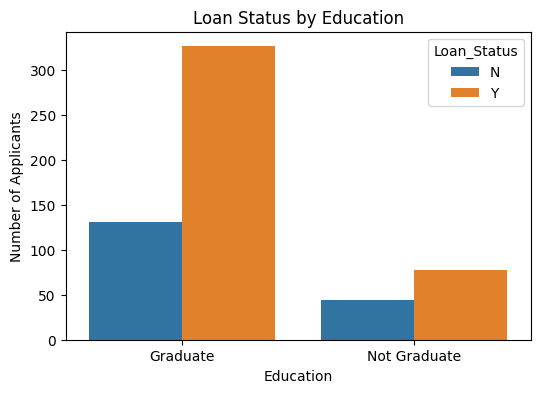

In [154]:
# Education important for approval?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Loan Status by Education")
plt.ylabel("Number of Applicants")
plt.show()

<Axes: xlabel='Loan_Status', ylabel='Loan_Amount'>

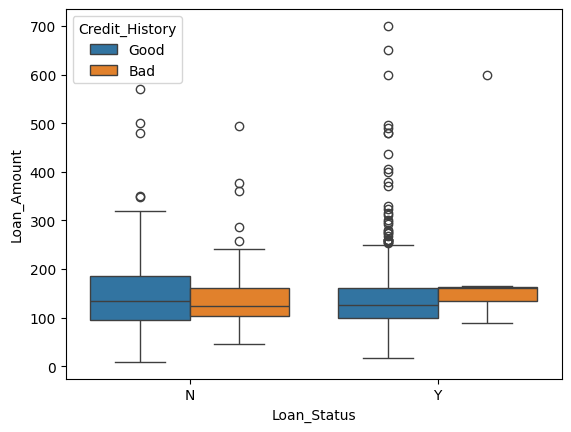

In [188]:
sns.boxplot(data=df, x='Loan_Status', y='Loan_Amount',hue='Credit_History')

People with good credit history are often approved higher loan amounts.

<Axes: xlabel='Loan_Status', ylabel='Loan_Amount'>

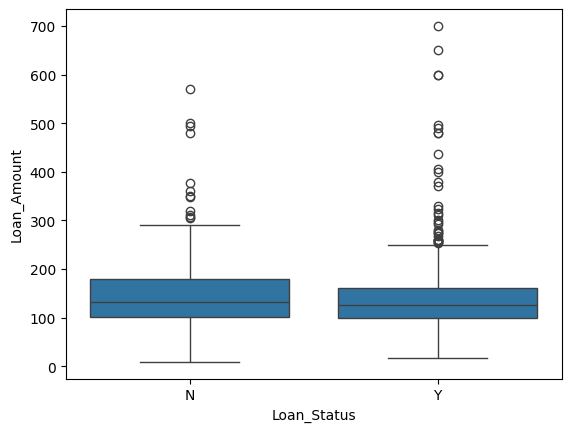

In [202]:
sns.boxplot(data=df, x='Loan_Status', y='Loan_Amount')

In [190]:
df.groupby("Property_Area")["Loan_Status"].Count

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [197]:
pd.crosstab(df["Property_Area"],df["Loan_Status"],normalize='index')*100

# OBSERVATION: Majority of the applicatns who are have property are as "Semiurban" are getting their loans approved

Loan_Status,N,Y
Property_Area,,
Rural,37.869822,62.130178
Semiurban,23.111111,76.888889
Urban,32.065217,67.934783


In [198]:
pd.crosstab(df["Property_Area"],df["Loan_Status"],normalize='columns')*100
# MANY APPLICANTS WHO HAVE THEIR LOAN STATUS AS "Y" ARE FROM "SEMIURBAN" AREAS.

Loan_Status,N,Y
Property_Area,,
Rural,36.571429,26.054591
Semiurban,29.714286,42.928040
Urban,33.714286,31.017370


In [218]:
# Creating a column for actual loan amount to check the ratio of Loan amount and Total Income.
df["Actual_Loan_Amount"] = df["Loan_Amount"] * 1000

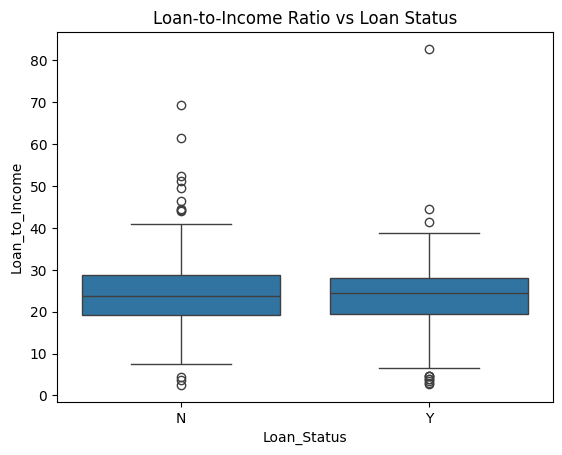

In [220]:
df['Loan_to_Income'] = df['Actual_Loan_Amount'] / df['Total_Income']

sns.boxplot(data=df, x='Loan_Status', y='Loan_to_Income')
plt.title("Loan-to-Income Ratio vs Loan Status")
plt.show()

In [235]:
# Majority of the applicants who get rejected have high Loan to Income ratio. 

In [236]:
#Even though they have almost same medians.
df.groupby('Loan_Status')['Loan_to_Income'].median()

Loan_Status
N    23.844546
Y    24.460157
Name: Loan_to_Income, dtype: float64

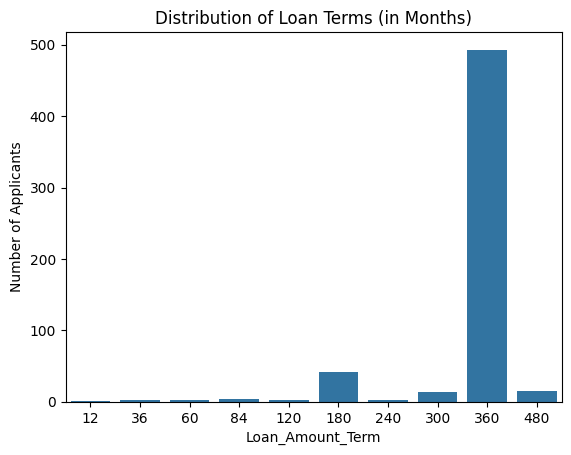

In [310]:
# 360 month loan term is the highest among all applicants.
sns.countplot(data=df, x='Loan_Amount_Term')
plt.title("Distribution of Loan Terms (in Months)")
plt.ylabel("Number of Applicants")
plt.show()

In [287]:
(pd.crosstab(df["Loan_Status"],df["Loan_Amount_Term"],normalize="columns")*100)

Loan_Amount_Term,12,36,60,84,120,180,240,300,360,480
Loan_Status,,,,,,,,,,
N,0.0,100.0,0.0,25.0,0.0,30.952381,33.333333,38.461538,29.208925,60.0
Y,100.0,0.0,100.0,75.0,100.0,69.047619,66.666667,61.538462,70.791075,40.0


In [296]:
# Since 360 month loan term is the highest among all applicants, 
# The percentage of Loan Approvals with 360 month loan term is greater than 70. 
# That means there is a high chance of approval in case of higher loan term period.

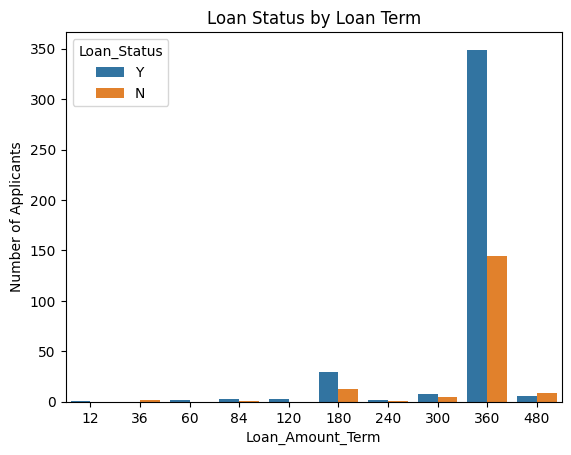

In [311]:
sns.countplot(data=df, x='Loan_Amount_Term', hue='Loan_Status')
plt.title("Loan Status by Loan Term")
plt.ylabel("Number of Applicants")
plt.show()

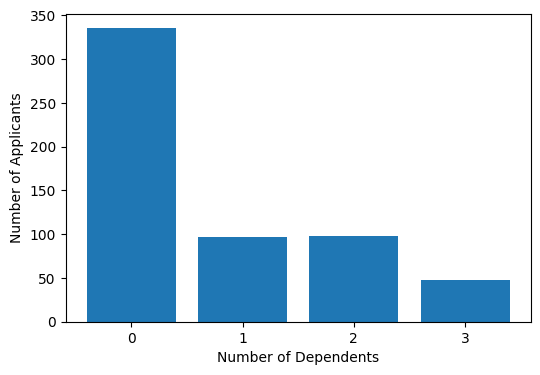

In [334]:
# Most of the applicants have 0 applicants.
plt.figure(figsize=(6,4))
plt.bar(df["Dependents"].value_counts().index,height=df["Dependents"].value_counts())
plt.ylabel("Number of Applicants")
plt.xlabel("Number of Dependents")
plt.xticks(np.arange(4))
plt.show()

In [304]:
df["Dependents"].value_counts()

Dependents
0    335
2     98
1     97
3     48
Name: count, dtype: int64

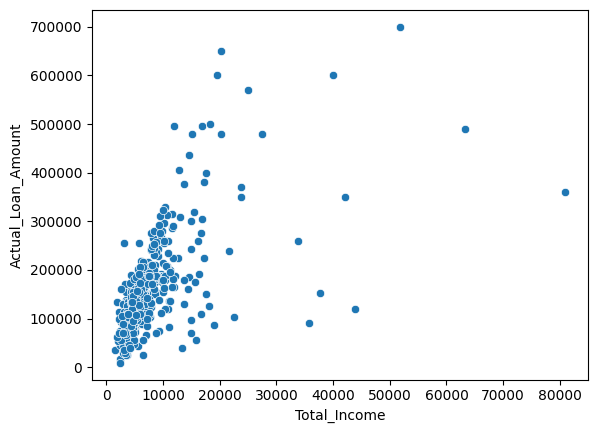

In [323]:
# Most of the applicants have loan amount ranging from 9000 to 3,00,000 USD 
# And their total incomes ranging from 1000 to 20000 USD
sns.scatterplot(data=df, x="Total_Income", y="Actual_Loan_Amount")
plt.show()

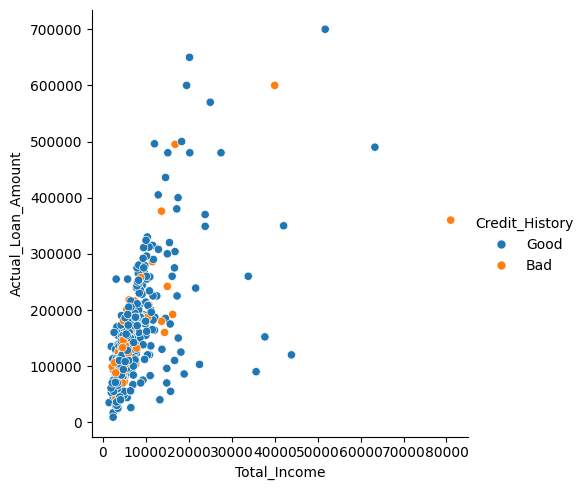

In [330]:
# Most of the applicants have Good Credit history. 
sns.relplot(data=df, x="Total_Income", y="Actual_Loan_Amount",hue="Credit_History")
plt.show()

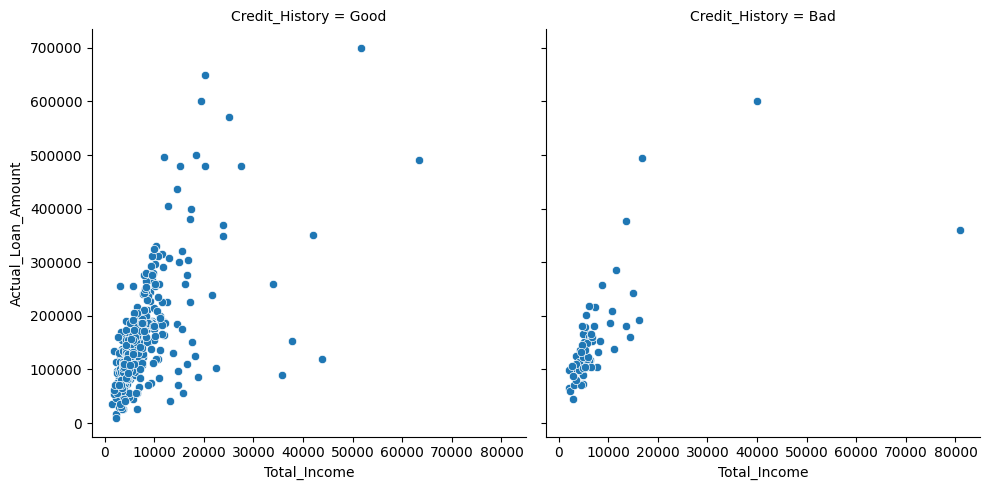

In [327]:
sns.relplot(data=df, x="Total_Income", y="Actual_Loan_Amount",col="Credit_History")
plt.show()

**Final Statement** : Loan eligibility is primarily driven by Credit History and supported by Loan Amount relative to Income (loan-to-income ratio), while Gender, Marital Status, Loan amount term  play only a minor role. The company can streamline approvals by prioritizing applicants with good credit history and balanced loan-to-income ratios.